# Denoising signals with the Fourier Transform

The Fourier transform is a tool that allows you to take a signal and see the power of each frequency in it. Let us start by definining the terms in the above statement:
- A **signal** is information that changes over time. For example, accelerometer, gyroscope, audio traces are all examples of signals.
- A **frequency** is the speed at which something repeats. For example, clocks tick at a frequency of one hertz (Hz), or one repetition per second.
- **Power**, in this case, just means the strength of each frequency.

You define two constants:

- **SAMPLING_RATE** determines how many data points the signal uses to represent the sine wave per second. 
- **DURATION** is the length of the generated samples in time, for example 1 second or five seconds.

In the example below, we are going to first create a signal at a sampling rate of 1000Hz and duration 1 second that is the sum of two sinusoidals (at 50Hz and 120Hz respectively). Then add a lot of random noise to the signal. 


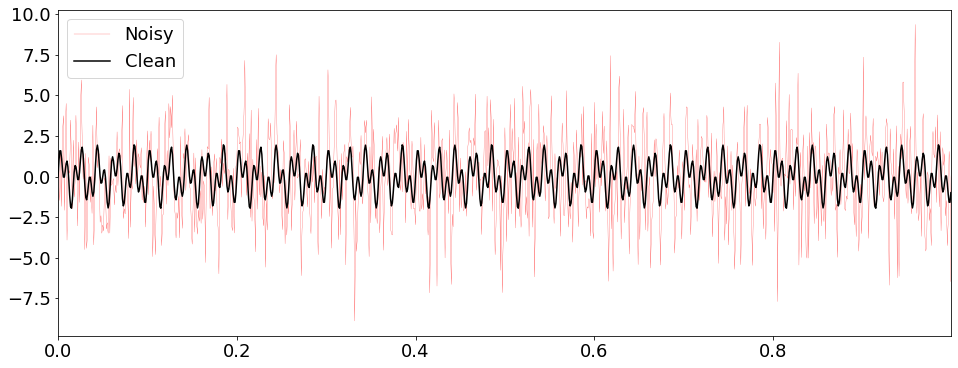

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

SAMPLING_RATE = 1000 #Hz
DURATION = 1         #second

# Create a simple signal with two frequencies
dt = 1/SAMPLING_RATE
t = np.arange(0,DURATION,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

plt.figure(figsize=(16,6))
plt.plot(t,f,color='red',linestyle='solid',linewidth=0.2,label='Noisy')
plt.plot(t,f_clean,color='black',linestyle='solid', label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

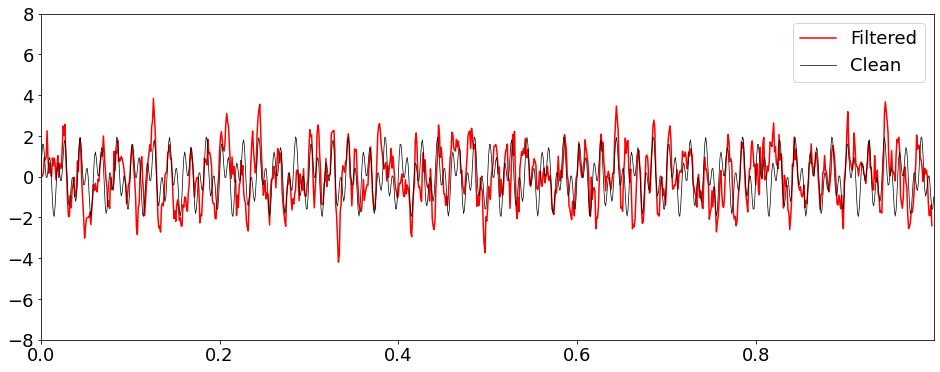

In [19]:
# FILL IN CODE: Apply moving average filter with window size 10
window = 5
filteredSignal = np.convolve(f, np.ones((window,))/window, mode='valid')
averageTimeStamps = np.convolve(t, np.ones((window,))/window, mode='valid')

plt.figure(figsize=(16,6))
plt.plot(averageTimeStamps,filteredSignal,color='red',linestyle='solid',label='Filtered')
plt.plot(t,f_clean,color='black',linestyle='solid',linewidth=0.7, label='Clean')
plt.xlim(t[0],t[-1])
plt.ylim([-8, 8])
plt.legend()
plt.show()

# Brief background of the Fourier series


As described in class, the fourier series is defined in terms of approximating a time-series signal f with sines and cosines.
$$ f(x) = \frac{a_o}{2} + \sum^\infty_{n = 1} a_n cos(nx) + b_n sin(nx)$$

Since we are dealing with length L time series, we will write this as (this is only to help you understand but we won't get into the details of fourier series and why this equation is true): 

$$ f(x) = \frac{a_o}{2} + \sum^\infty_{n = 1} a_n cos(\frac{n \pi x}{L}) + b_n sin(\frac{n \pi x}{L})$$

However, it is a lot easier to use Euler's formula to convert from sines and cosines to exponentials. 

$$ e^{i \theta} = cos\theta + i sin\theta $$
$$ e^{-i \theta} = cos\theta - i sin\theta $$

Exponentials are a lot easier to use than operating with sines and cosines and make the fourier transform operations significantly easier. So, for convenience, we use the complex exponentials as the basis for the fourier series. 

$$ f(t) = c_o + \sum^\infty_{n = -\infty} c_n e^{i \frac{n \pi x}{L}}$$

This is why if you print the output of the fourier transform in python, you will see complex numbers. 

Once you calculate the fourier transform using exponentials, its easy to go back to the sines and cosines as follows:

$$ f(x) = c_o + \sum^\infty_{n = 1} (c_n+c_{-n}) cos(\frac{n \pi x}{L}) + (c_n-c_{-n}) sin(\frac{n \pi x}{L})$$

In [2]:
from scipy.fft import fft, fftfreq

## Compute the Fast Fourier Transform (FFT)
N = len(t)
yf = fft(f_clean,N)                     # Compute the FFT
xf = fftfreq(N,1/SAMPLING_RATE)

np.set_printoptions(linewidth=1)
print('Head of the array')
print(yf[1:4])
print('Tail of the array')
print(yf[-3:])

Head of the array
[9.11844116e-15-3.43876616e-14j
 1.02492097e-15-3.74599123e-13j
 3.82295328e-13-1.06010749e-15j]
Tail of the array
[3.82295328e-13+1.06010749e-15j
 1.02492097e-15+3.74599123e-13j
 9.11844116e-15+3.43876616e-14j]


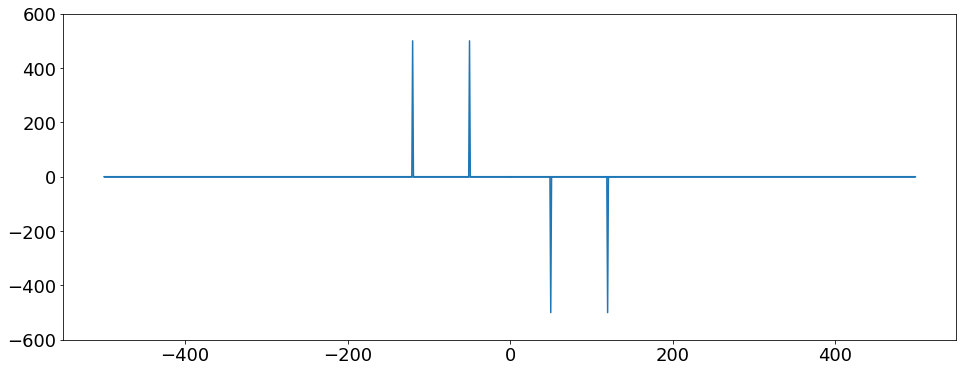

In [5]:
plt.figure(figsize=(16,6))
plt.plot(xf, yf.imag)
plt.ylim([-600, 600])
plt.show()

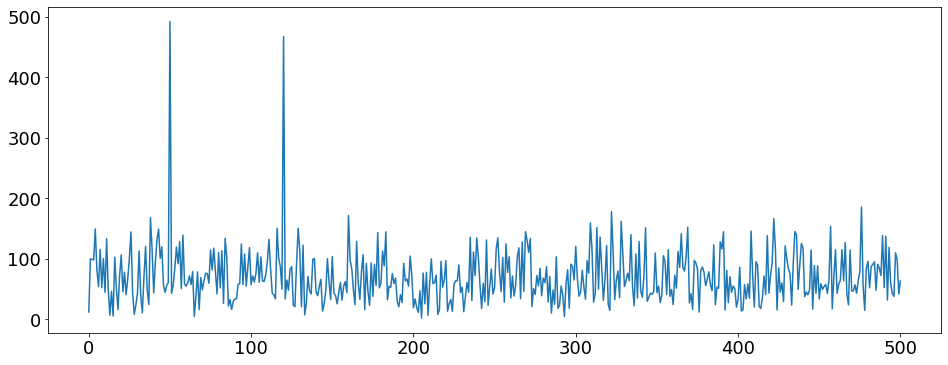

In [8]:
from scipy.fft import rfft, rfftfreq

## Compute the Fast Fourier Transform (FFT)
N = len(t)
yf = rfft(f,N)                     # Compute the FFT
xf = rfftfreq(N,1/SAMPLING_RATE)

plt.figure(figsize=(16,6))
plt.plot(xf, np.abs(yf))
plt.show()

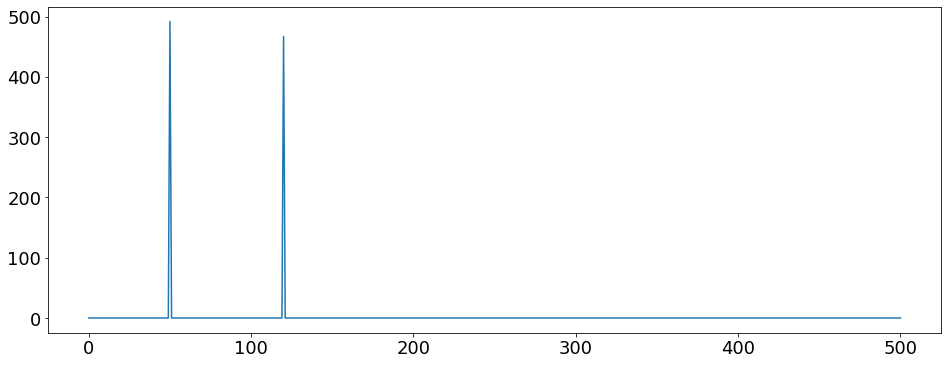

In [9]:
## Use the absolute value to filter out noise
indices = np.abs(yf) > 300       # Find all freqs with large power
yf_clean = indices * yf          # Zero out small Fourier coeffs. in Y
ffilt = np.fft.irfft(yf_clean)   # Inverse FFT for filtered time signal

plt.figure(figsize=(16,6))
plt.plot(xf, np.abs(yf_clean))
plt.show()

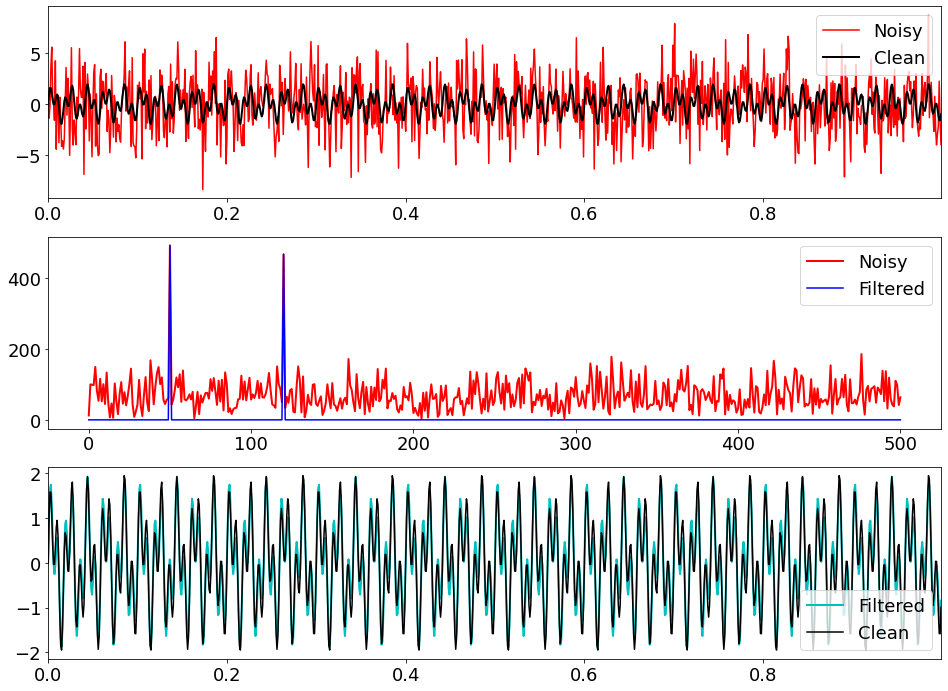

In [10]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(xf,abs(yf),color='r',linewidth=2,label='Noisy')
plt.plot(xf,abs(yf_clean),color='b',linewidth=1.5,label='Filtered')
plt.legend()

plt.sca(axs[2])
plt.plot(t,ffilt,color='c',linewidth=2,label='Filtered')
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()

# Why use filters and not the above approach? 

You might wonder why not just use the above method for denoising the data in your assignment. Why bother with building a band-pass or low-pass butterworth filter? Why not just remove all frequencies above or below a cutoff threshold. 

The reason is because have a very sharp cutoff for a filter (also called a brick wall filter) results in artifacts in the signal. The reason is a bit involved and will require more background in signal processing. But the general idea is that you are limited by the number of points in the fourier transform (the default in python is 256). The cutoff is as sharp as the number of points in the transform (The frequency resolution is 1/(total length of transform). If you want an infintely sharp cutoff, we need an infinite number of points. In any finite cutoff, you remove frequencies at those points but you end up with some artifacts at other freqeuencies.

<table>
    <tr><td><img src='figures/brick-wall-filter.png'></td>
        <td><img src='figures/brick-wall-filter-padded.png'></td>
    </tr>
</table>